# Python Mini Project

* View on my [GitHub](https://github.com/Peyton-Smith05/Multi-Echo-Filter-and-Feedback-Comb-Filter)

## Different types of echo filters

* Source: https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/discrete_systems_time_domain/convolution_room_IR.ipynb

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig


# Collecting waveform data

* putting data into x 
* plotting x with respect to time for comparison purposes

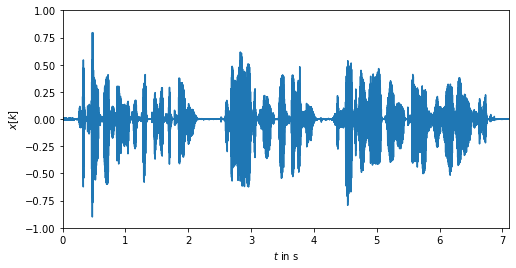

In [25]:
x, fs = sf.read('../assets/audio_files/data_speech.wav')
plt.figure(figsize=(8,4))
t = np.arange(len(x)) / fs

plt.plot(t, x)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);

# Creating function for both filters

* First function is for multi echo filter
  * 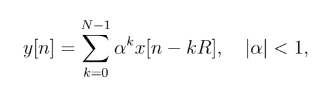
  * Utilizing varying ranges for alpha R and N to get the right echo

* Second function is for feedback comb filter
  * 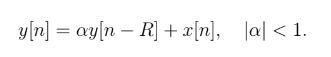
  * Utilizes R and alpha to get a diminishing echo for the response

In [26]:
'''
TODO:

* Define parameters alpha, R, and N
    * alpha^k is the magnitude
    * k*R is the offset
    * k iterates from 0 to N-1

* for each value in x 
    * propogate its echo N-1 times
        * for each propogation add it to the sum
    * add to y vector
'''
def multiEchoFilter(waveform, alpha, R, N):
  y = []

  pos = 0
  for x_val in waveform:
    Sum = 0

    for k in range(N-1):
      
      if ((pos-(k*R)) > 0):
        Sum += (waveform[pos-k*R] * (alpha**k))
      else:
        break
    
    y.append(Sum + waveform[pos])

    pos+=1
  return y



''' 
iterate through waveform array
  For each iteration use formulat alpha*y + x and add it to y
'''
def feedbackCombFilter(waveform, alpha, R):
  y = []
  for i in range(len(waveform)):
    if(i-R > 0):
      cur = alpha*y[i-R] + waveform[i]
      y.append(cur)
    else:
      y.append(waveform[i])

  return y



# Inputing parameters

* Multiecho Filter
  * Parameters where chosen as 
  * alpha = .7
    * Through experimenting with different values I discovered that the Alpha value changes how soon the echo diminishes. With an alpha value < .5 there were not enough strong echos for it to sound the the given wet_source.wav. Upon further auditory testing I decided .7 was the closest to it.
  * R = 7777
    * The R value changes how far apart the echos are. This one was hard to determine because in the x array each data point accounts for about .0001 of a second. This meant that the R value needed to be high so that the echos carried out accross multiple seconds. Anything under 5000 I determined was too quick and did not sound right. The actual value of 7777 was slightly arbitrary. I just determined that the 7-8 thounsand range sounded the best and looked the most similar graphically.
  * N = 5 
    * N increases the runtime of the function dramatically. Anything over 15 it starts to take over 20 seconds to run, mostly because of the size of the array. The only noticable change in make is the clarity of the echo. To high and it is not clear, too low and it is too clear.

* Feedback Comb filter
  * alpha = .7 again
    * Alpha in this equation also does something similar by determining how quickly the echo fades. Upon auditory and graphically testing, it was determined to be .7 again.
  * R = 6000 
    * R value increases the noisiness of the echo. Anything over 6000 was determined to be too cluttered and noisy.

In [27]:
# Define parameters for multiecho filter
alpha, R, N = .7, 7777, 5

y_mul_echo = multiEchoFilter(x,alpha, R, N)

# Defining parameters for feedback comb filter
alpha, R = .7, 6000

y_f_comb = feedbackCombFilter(x,alpha, R)



## Computing the convolution

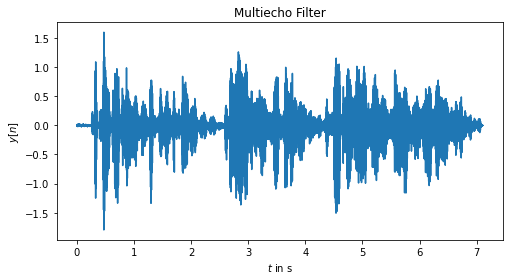

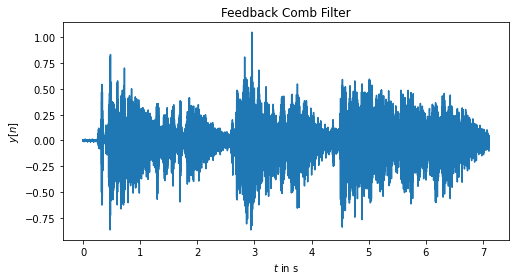

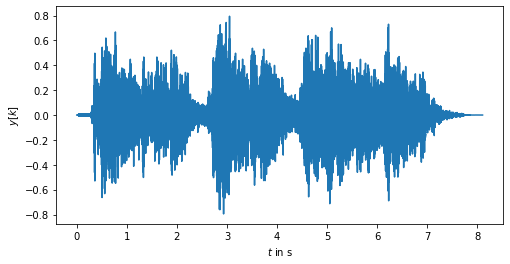

In [28]:
# Plotting both filters

# Multi Echo 
plt.figure(figsize=(8,4))
plt.plot(t, y_mul_echo)
plt.title("Multiecho Filter")
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[n]$');

# Feedback Comb
plt.figure(figsize=(8,4))
plt.plot(t, y_f_comb)
plt.title("Feedback Comb Filter")
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[n]$');


# Plotting convolution for comparison
h, fsh = sf.read('../assets/audio_files/data_room_impulse_response.wav')
y = np.convolve(h, x)
#normalizing
y = max(x) * y / np.max(np.abs(y))
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(y))
plt.plot(t, y)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[k]$');

## Writing to output files

In [29]:
# Writing two files
sf.write('../assets/audio_files/multiEchoFilter.wav', y_mul_echo, fs)
sf.write('../assets/audio_files/FeedbackCombFilter.wav', y_f_comb, fs)